In [1]:
pip install jovian opendatasets --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/competitions/home-credit-default-risk/data")

Skipping, found downloaded files in "./home-credit-default-risk" (use force=True to force download)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pd.set_option('display.max_columns', 130)
application_train = pd.read_csv("home-credit-default-risk/application_train.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
application_test = pd.read_csv("home-credit-default-risk/application_test.csv")
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [4]:
application_train.shape

(307511, 122)

In [5]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
application_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

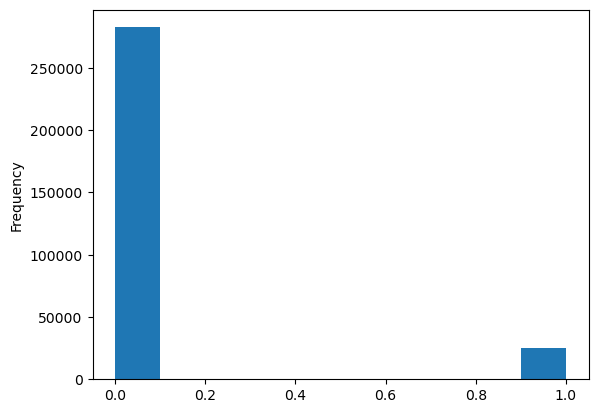

In [7]:
application_train['TARGET'].plot.hist();

In [8]:
def missing_value_table(df):
    miss_val = df.isnull().sum()
    
    miss_val_perc = miss_val * 100 / len(df)
    
    miss_df = pd.concat([miss_val, miss_val_perc], axis = 1)
    
    miss_df_rename = miss_df.rename(columns = {0:'Missing Values', 1:"Missing_Percentage"})
    
    
    miss_df_rename_col = miss_df_rename[miss_df_rename.iloc[:,1] !=0].sort_values("Missing_Percentage", ascending = False).round(1)
    
    print(f"Your selected dataframe has {application_train.shape[1]} columns.\n" f"There are {miss_df_rename_col.shape[0]} which have missing values.")
    
    return miss_df_rename_col

In [9]:
missing_value_table(application_train)

Your selected dataframe has 122 columns.
There are 67 which have missing values.


,Missing Values,Missing_Percentage
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [10]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [11]:
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

for col in application_train:
    if application_train[col].dtype == 'object':
        if len(application_train[col].unique()) <= 2:
            le.fit(application_train[col])
            
            application_train[col] = le.transform(application_train[col])
            application_test[col] = le.transform(application_test[col])
            
            le_count +=1
            
print("%d columns are label encoded" % le_count)

3 columns are label encoded


In [13]:
categorical = []
for col in application_train:
    if application_train[col].dtype == 'object':
        categorical.append(col)
        
categorical

['CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [14]:
# application_train = pd.get_dummies(application_train)
# application_test = pd.get_dummies(application_test)

# print('Training Features shape: ', application_train.shape)
# print('Testing Features shape: ', application_test.shape)

application_train[categorical].isna().sum()

CODE_GENDER                        0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [15]:
application_train[categorical] = application_train[categorical].fillna("something")
application_test[categorical] = application_test[categorical].fillna("something")

application_train[categorical].isnull().sum()

CODE_GENDER                   0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64

In [16]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')

# enc.fit(application_train[categorical])

# encoded_cols = list(enc.get_feature_names(categorical))

# train_encoded[encoded_cols] = enc.transform(application_train[categorical])
# test_encoded = enc.transform(application_test[categorical])

# train_encoded_df = pd.DataFrame(data = train_encoded.toarray(), columns = encoded_cols )

# train_num = application_train[[col for col in application_train if col not in categorical]]

# test_encoded_df = pd.DataFrame(data = test_encoded.toarray(), columns = encoded_cols)
# test_num = application_test[[col for col in application_test if col not in categorical]]

# application_train = pd.concat([train_num, train_encoded_df], axis = 1)
# application_test = pd.concat([test_num, test_encoded_df], axis = 1)

# application_train.drop(columns = ['something'], inplace = True)
# application_test.drop(columns = ['something'], inplace = True)

# print("Training feature shape: ", application_train.shape)
# print("Testing feature shape: ", application_test.shape)

In [17]:
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

enc = OneHotEncoder(handle_unknown='ignore', sparse = False) #hangle _unknown = 'ignore' it means if some data category is different in train and test dataframe them both it will treated as 0, Instead of throwing an error.

enc.fit(application_train[categorical])

encoded_cols = list(enc.get_feature_names_out(categorical))

application_train[encoded_cols] = enc.transform(application_train[categorical])
application_test[encoded_cols] = enc.transform(application_test[categorical])


# train_encoded_df = pd.DataFrame(data = train_encoded.toarray(), columns = encoded_cols )

# train_num = application_train[[col for col in application_train if col not in categorical]]

# test_encoded_df = pd.DataFrame(data = test_encoded.toarray(), columns = encoded_cols)
# test_num = application_test[[col for col in application_test if col not in categorical]]

# application_train = pd.concat([train_num, train_encoded_df], axis = 1)
# application_test = pd.concat([test_num, test_encoded_df], axis = 1)

# print("Training feature shape: ", application_train.shape)
# print("Testing feature shape: ", application_test.shape)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [18]:
print("Training feature shape: ", application_train.shape)
print("Testing feature shape: ", application_test.shape)

Training feature shape:  (307511, 122)
Testing feature shape:  (48744, 121)


In [19]:
categorical

['CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [20]:
print(application_train.columns)
print(application_test.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_

In [21]:
for column in categorical:
    if column not in application_train.columns:
        print(f"Column not found in train: {column}")
    if column not in application_test.columns:
        print(f"Column not found in test: {column}")

In [22]:
application_train = application_train.drop(columns= categorical)
application_test = application_test.drop(columns = categorical)

In [23]:
print("Training feature shape: ", application_train.shape)
print("Testing feature shape: ", application_test.shape)

Training feature shape:  (307511, 109)
Testing feature shape:  (48744, 108)


In [24]:
(application_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [25]:
(application_train['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

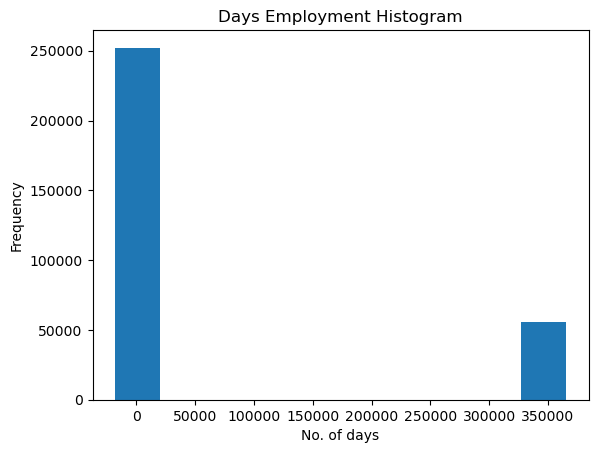

In [26]:
application_train['DAYS_EMPLOYED'].plot.hist(title = "Days Employment Histogram")
plt.xlabel("No. of days");

In [27]:
application_train[application_train['DAYS_EMPLOYED'] == 365243].shape[0] * 100 /len(application_train)

18.00716071945394

In [28]:
anom = application_train[application_train['DAYS_EMPLOYED'] == 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] != 365243]

print(f"{100 * anom['TARGET'].mean().round(3)} % of anomalies default loan.")
print(f"{100 * non_anom['TARGET'].mean().round(3)} % of non_anomalies default loan.")
print(f"There are { len(anom)} anomalous days of employment")

5.4 % of anomalies default loan.
8.7 % of non_anomalies default loan.
There are 55374 anomalous days of employment


In [29]:
# Magic command for autocompletion
%config Completer.use_jedi = False

<Axes: ylabel='Frequency'>

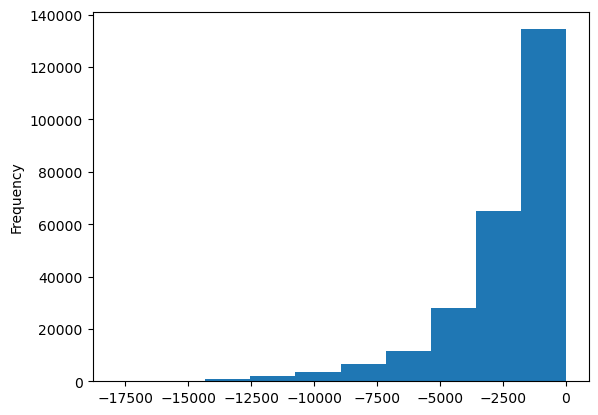

In [30]:
application_train['DAYS_EMPLOYED_ANOM'] = (application_train['DAYS_EMPLOYED'] == 365243)

application_train['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)

application_train['DAYS_EMPLOYED'].plot.hist()

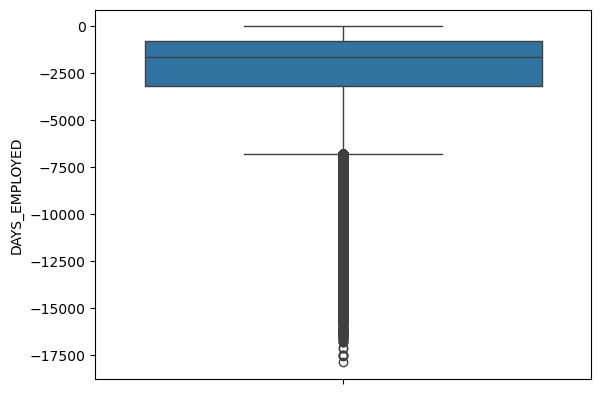

In [31]:
sns.boxplot(application_train['DAYS_EMPLOYED']);

In [32]:
application_test['DAYS_EMPLOYED_ANOM'] = (application_test['DAYS_EMPLOYED'] == 365243)

application_test['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)

print(f"Anomalous values {application_test['DAYS_EMPLOYED_ANOM'].sum()} in DAYS_EMPLOYED column out of {len(application_test)} values")

Anomalous values 9274 in DAYS_EMPLOYED column out of 48744 values


In [33]:
correlations = application_train.corr()['TARGET'].sort_values()

print("Most Positive Correlations: \n", correlations.tail(15))
print("\nMost Negative Correlations: \n", correlations.head(15))

Most Positive Correlations: 
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations: 
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.03964

In [34]:
(application_train['DAYS_BIRTH']/365).describe()

count    307511.000000
mean        -43.936973
std          11.956133
min         -69.120548
25%         -53.923288
50%         -43.150685
75%         -34.008219
max         -20.517808
Name: DAYS_BIRTH, dtype: float64

In [35]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982709

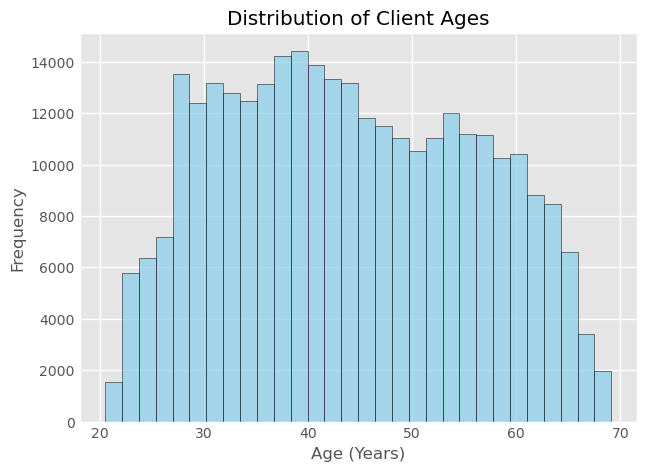

In [89]:
plt.style.use('ggplot')

# Calculate age in years
age_years = application_train['DAYS_BIRTH'] / 365

# Create a histogram with modified parameters
plt.hist(age_years, bins=30, edgecolor='black', color='skyblue', alpha=0.7)

# Set title and labels with slight modifications
plt.title('Distribution of Client Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')

# Show a grid
plt.grid(True)

# Display the plot
plt.show()

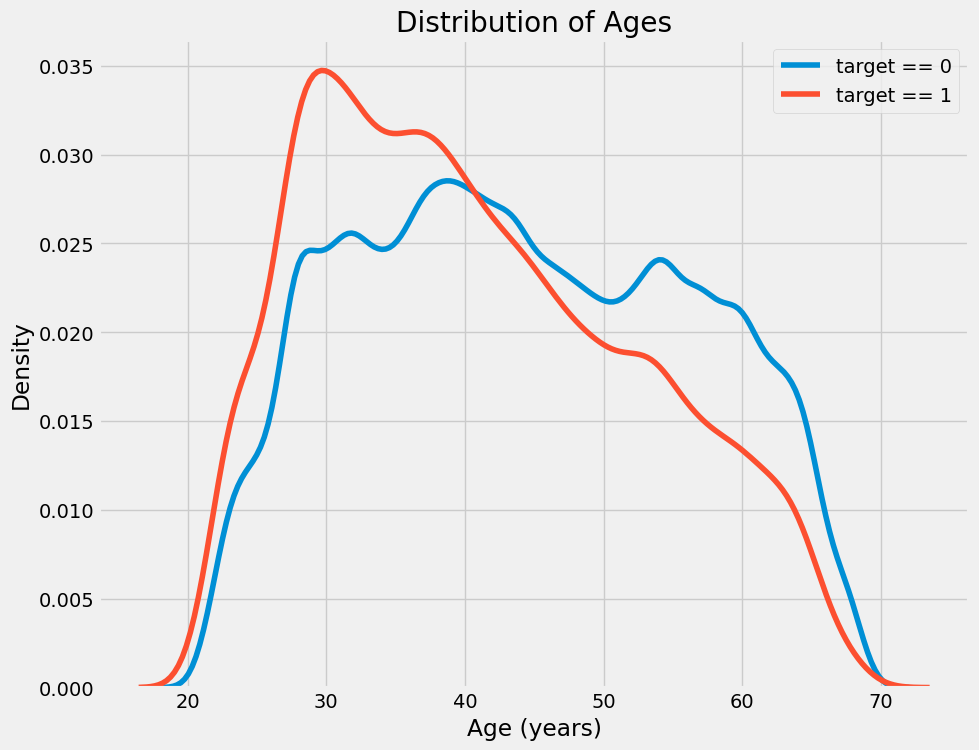

In [37]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend();

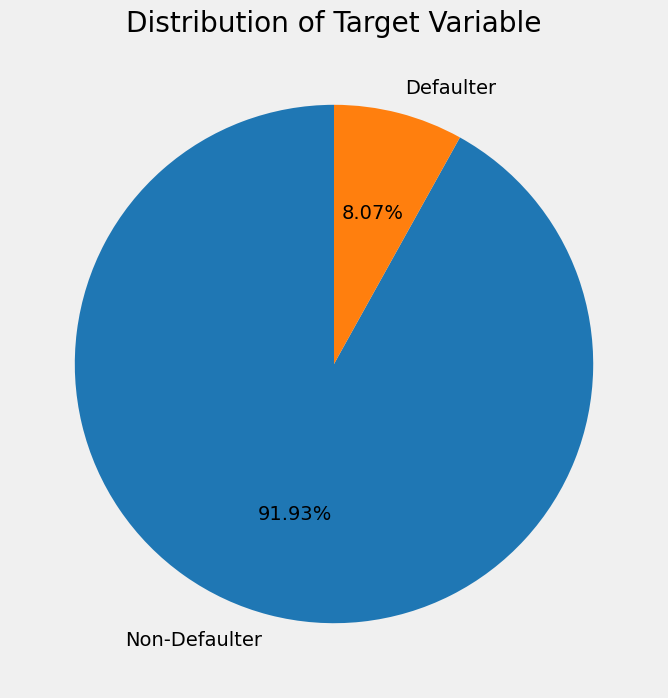

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each class
target_counts = application_train['TARGET'].value_counts()

# Define labels and colors for the pie chart
labels = ['Non-Defaulter', 'Defaulter']
colors = ['#1f77b4', '#ff7f0e']  # Blue for non-defaulters, Orange for defaulters

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.show()


In [38]:
age_data = application_train[['TARGET', 'DAYS_BIRTH']]

age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [39]:
age_grp = age_data.groupby('YEARS_BINNED').mean()
age_grp

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


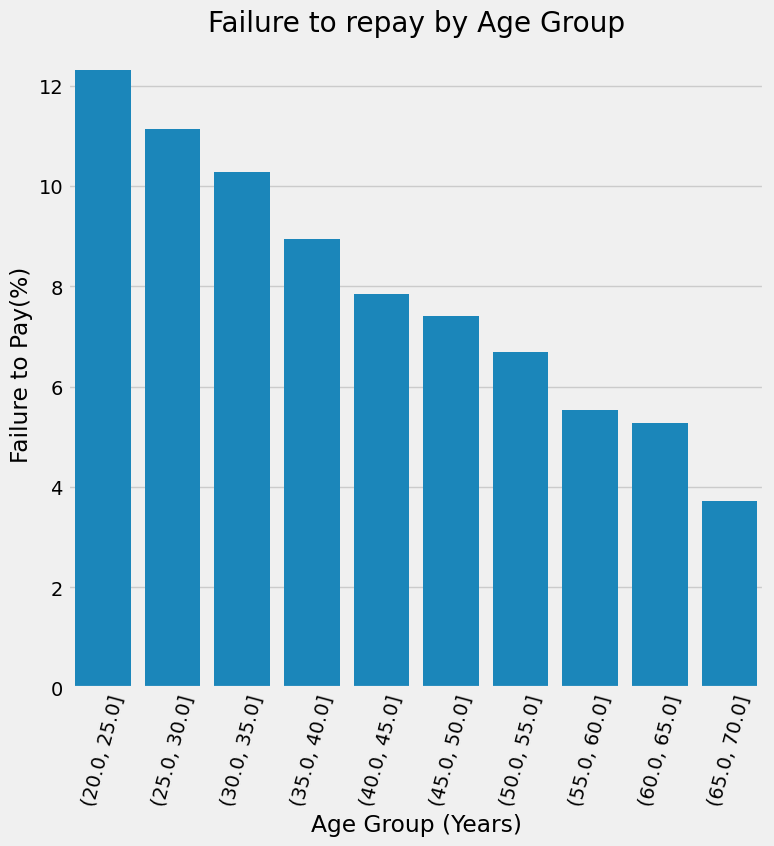

In [40]:
plt.figure(figsize = (8,8))
sns.barplot(x = age_grp.index.astype(str), y = 100*age_grp['TARGET'])

plt.title("Failure to repay by Age Group"); plt.xlabel("Age Group (Years)"); plt.ylabel("Failure to Pay(%)"); plt.xticks(rotation = 75);

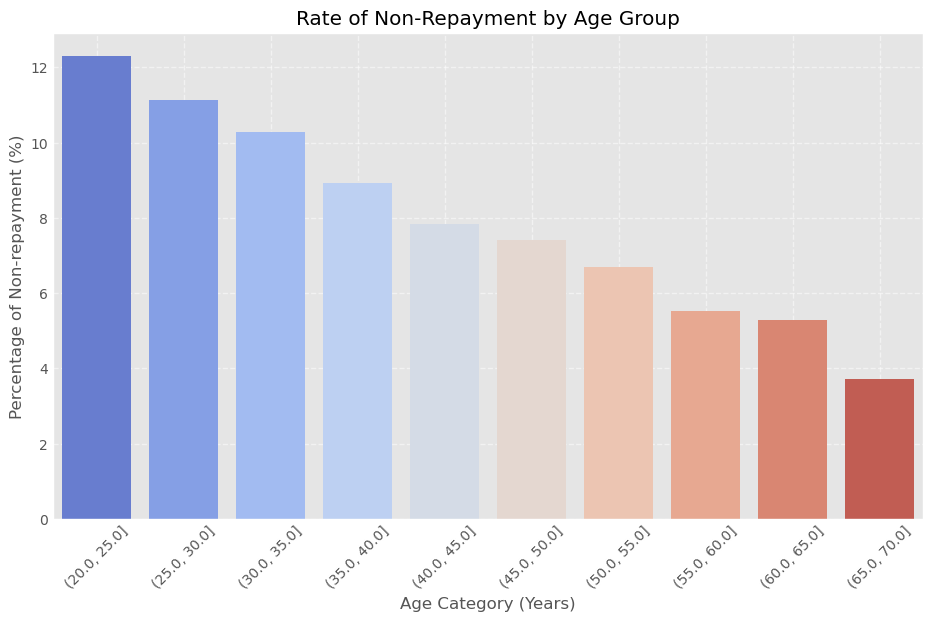

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of 'TARGET' within each age group
percentage_failure = 100 * age_grp['TARGET']

# Create the bar plot with a different size and aesthetic adjustments
plt.figure(figsize=(10, 6))  # Changed figure size
sns.barplot(x=age_grp.index.astype(str), y=percentage_failure, palette='coolwarm')  # Changed color palette

# Set the plot title and labels with minor textual tweaks
plt.title("Rate of Non-Repayment by Age Group")
plt.xlabel("Age Category (Years)")
plt.ylabel("Percentage of Non-repayment (%)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)  # Changed rotation angle

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)  # Added grid with style

# Show the plot
plt.show()


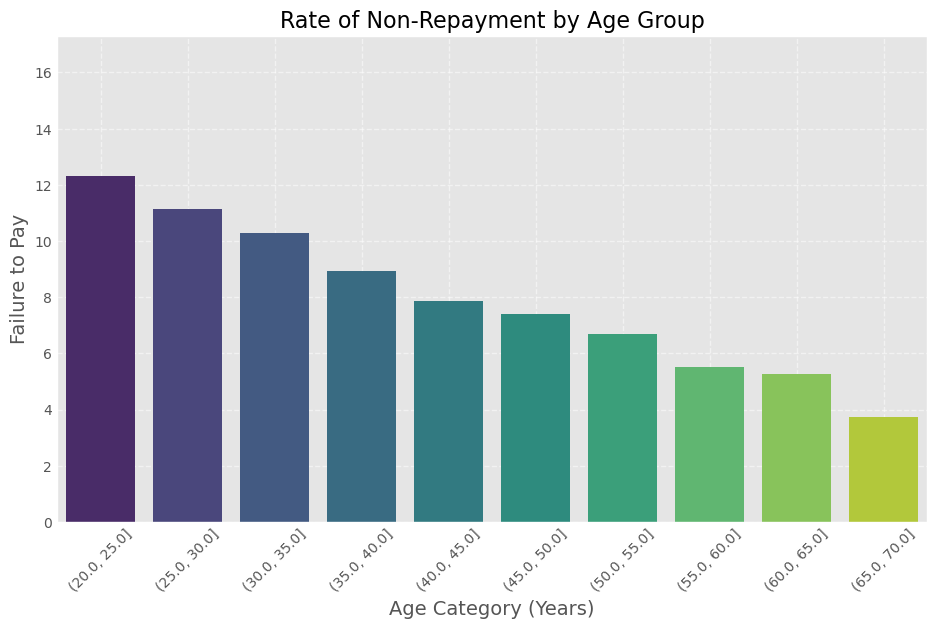

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of 'TARGET' within each age group
percentage_failure = 100 * age_grp['TARGET']

plt.figure(figsize=(10, 6))  # Adjusted figure size for better display
sns.barplot(x=age_grp.index.astype(str), y=percentage_failure, palette='viridis')  # Using a different color palette

# Set the plot title and labels with minor textual tweaks
plt.title("Rate of Non-Repayment by Age Group", fontsize=16)  
plt.xlabel("Age Category (Years)", fontsize=14) 
plt.ylabel("Failure to Pay", fontsize=14) 

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust rotation for readability

# Extend the y-axis to show smaller variations more clearly
plt.ylim(0, percentage_failure.max() + 5) 

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [41]:
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corr = ext_data.corr()
ext_data_corr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


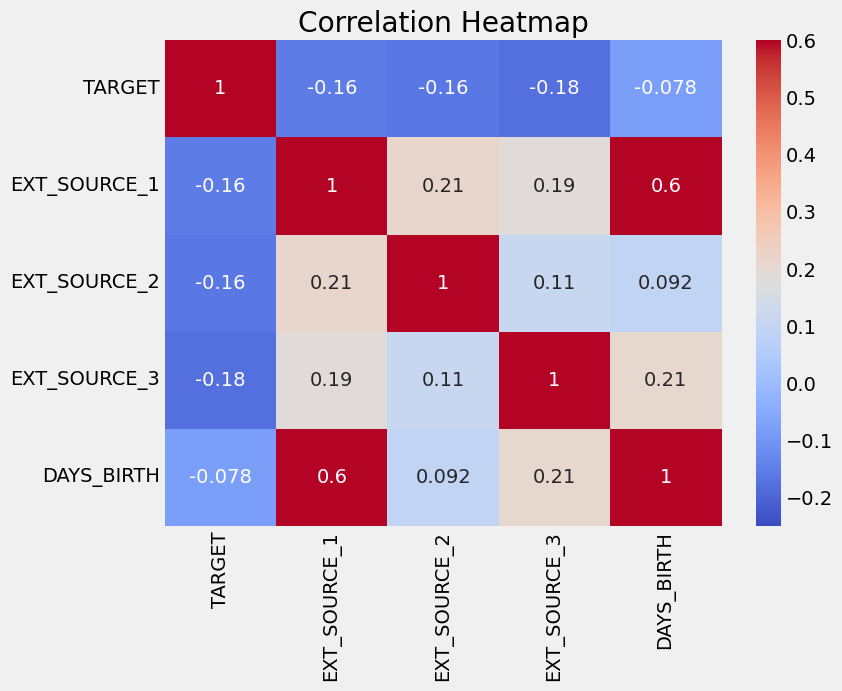

In [42]:
plt.figure(figsize = (8,6))

sns.heatmap(ext_data_corr, cmap = 'coolwarm', vmin = -0.25, annot = True, vmax = 0.6)

plt.title('Correlation Heatmap');

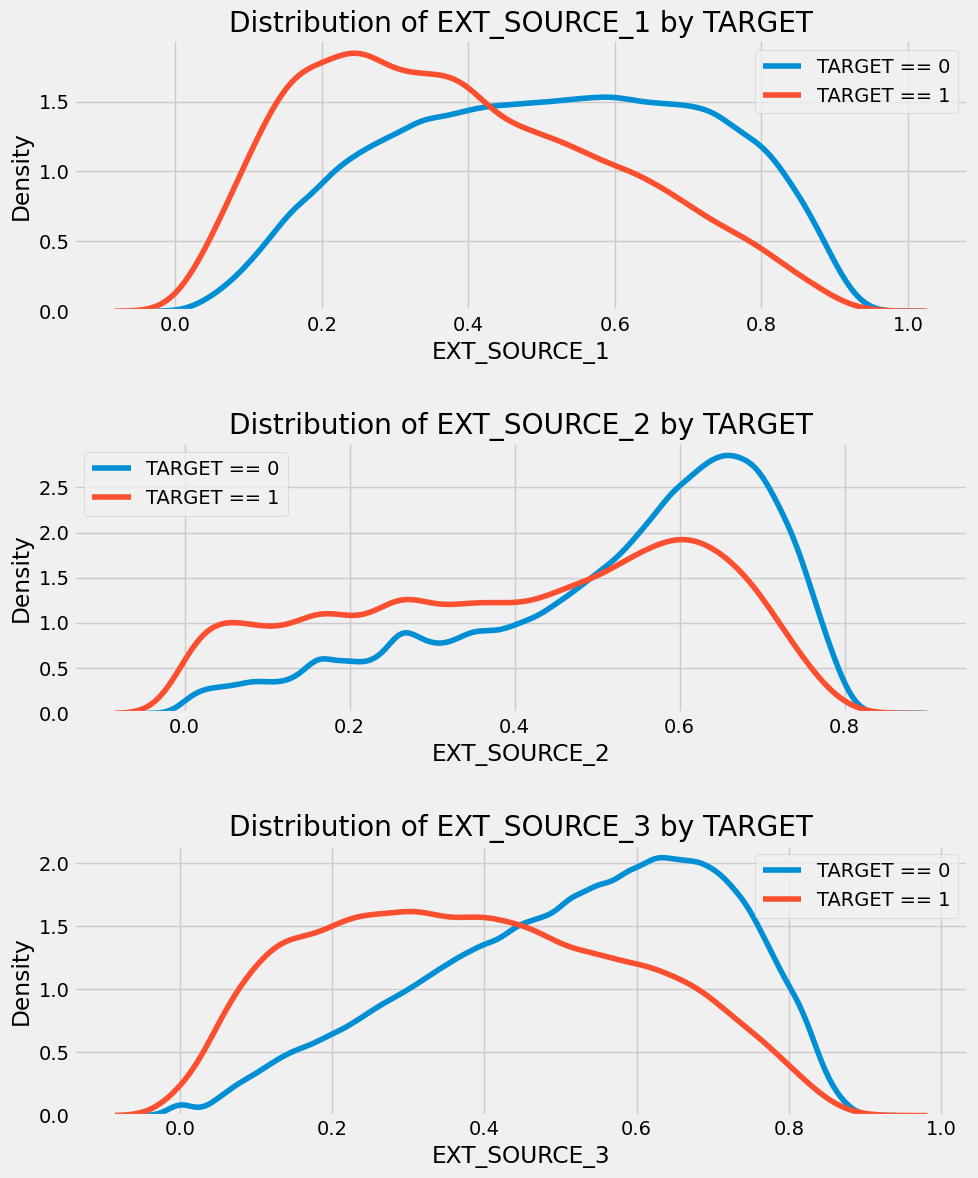

In [43]:
plt.figure(figsize = (10,12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    plt.subplot(3, 1, i+1)
    
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label= "TARGET == 0")
    
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label= "TARGET == 1")
    
    plt.title(f"Distribution of {source} by TARGET")
    
    plt.xlabel(source); plt.ylabel("Density"); plt.legend()
    
plt.tight_layout(h_pad = 2.5)
    

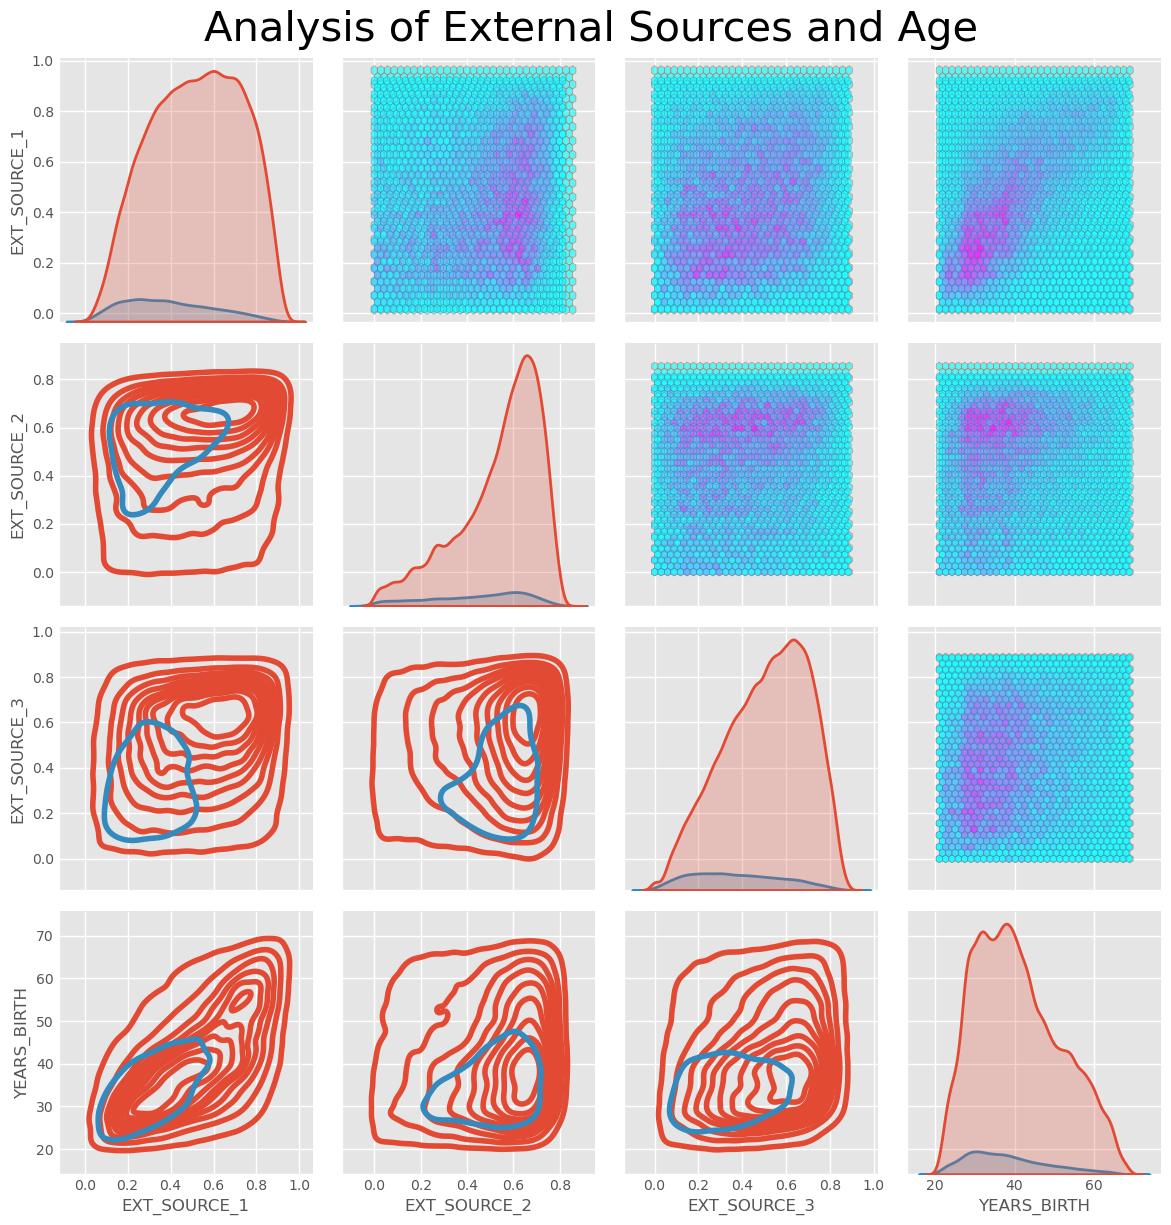

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Copy the data for plotting
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# Add the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop NA values and limit to first 100000 rows
plot_data = plot_data.dropna().iloc[:100000, :]

# Function to calculate correlation coefficient between two columns and display it
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate(f"Corr: {r:.2f}", xy=(.1, .9), xycoords=ax.transAxes, color='blue', size=15)

# Create the pairgrid object with different aesthetics
grid = sns.PairGrid(data=plot_data, height=3, diag_sharey=False,
                    hue='TARGET', 
                    vars=[x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a hexbin plot with gridsize reduced for clarity, using a cooler color palette
grid.map_upper(plt.hexbin, gridsize=30, cmap='cool', alpha=0.6)

# Diagonal is a density plot, now using a green color
grid.map_diag(sns.kdeplot, lw=2, shade=True, color='green')

# Lower is a density plot, using a warm color palette
grid.map_lower(sns.kdeplot, cmap='YlOrBr')

# Modify overall title and aesthetics
plt.suptitle('Analysis of External Sources and Age', size=30, y=1.02)

# Show the plot
plt.show()


Feature Engineering

In [45]:
# Make new dataframe for Polynomial_Features.

poly_features = application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = application_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

poly_features = imputer.fit_transform(poly_features)

poly_features_test = imputer.transform(poly_features_test)

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)

poly_features_test = poly_transformer.transform(poly_features_test)

print('Poly Features Shape: ', poly_features.shape)

Poly Features Shape:  (307511, 35)


In [47]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [48]:
# Create a dataframe of the features

poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['TARGET'] = poly_target

poly_corrs = poly_features.corr()["TARGET"].sort_values()

print(poly_corrs.head(10))

print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [49]:
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

#Merge Polynomial Features to a training dataframe
poly_features['SK_ID_CURR'] = application_train['SK_ID_CURR']

app_train_poly = application_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

#Merge Polynomial Features to a testing dataframe
poly_features_test['SK_ID_CURR'] = application_test['SK_ID_CURR']

app_test_poly = application_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

#Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join= 'inner', axis = 1)

#Print out the new shapes
print('Training data with the new Polynomial features', app_train_poly.shape)

print('Testing data with the new Polynomial features', app_test_poly.shape)

Training data with the new Polynomial features (307511, 144)
Testing data with the new Polynomial features (48744, 144)


In [50]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039.0,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,-3038.0,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,

In [51]:
app_train_domain = application_train.copy()
app_test_domain = application_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT']/app_train_domain['AMT_INCOME_TOTAL']

app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY']/app_train_domain['AMT_INCOME_TOTAL']

app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_CREDIT']/app_train_domain['AMT_ANNUITY']

app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED']/app_train_domain['DAYS_BIRTH']

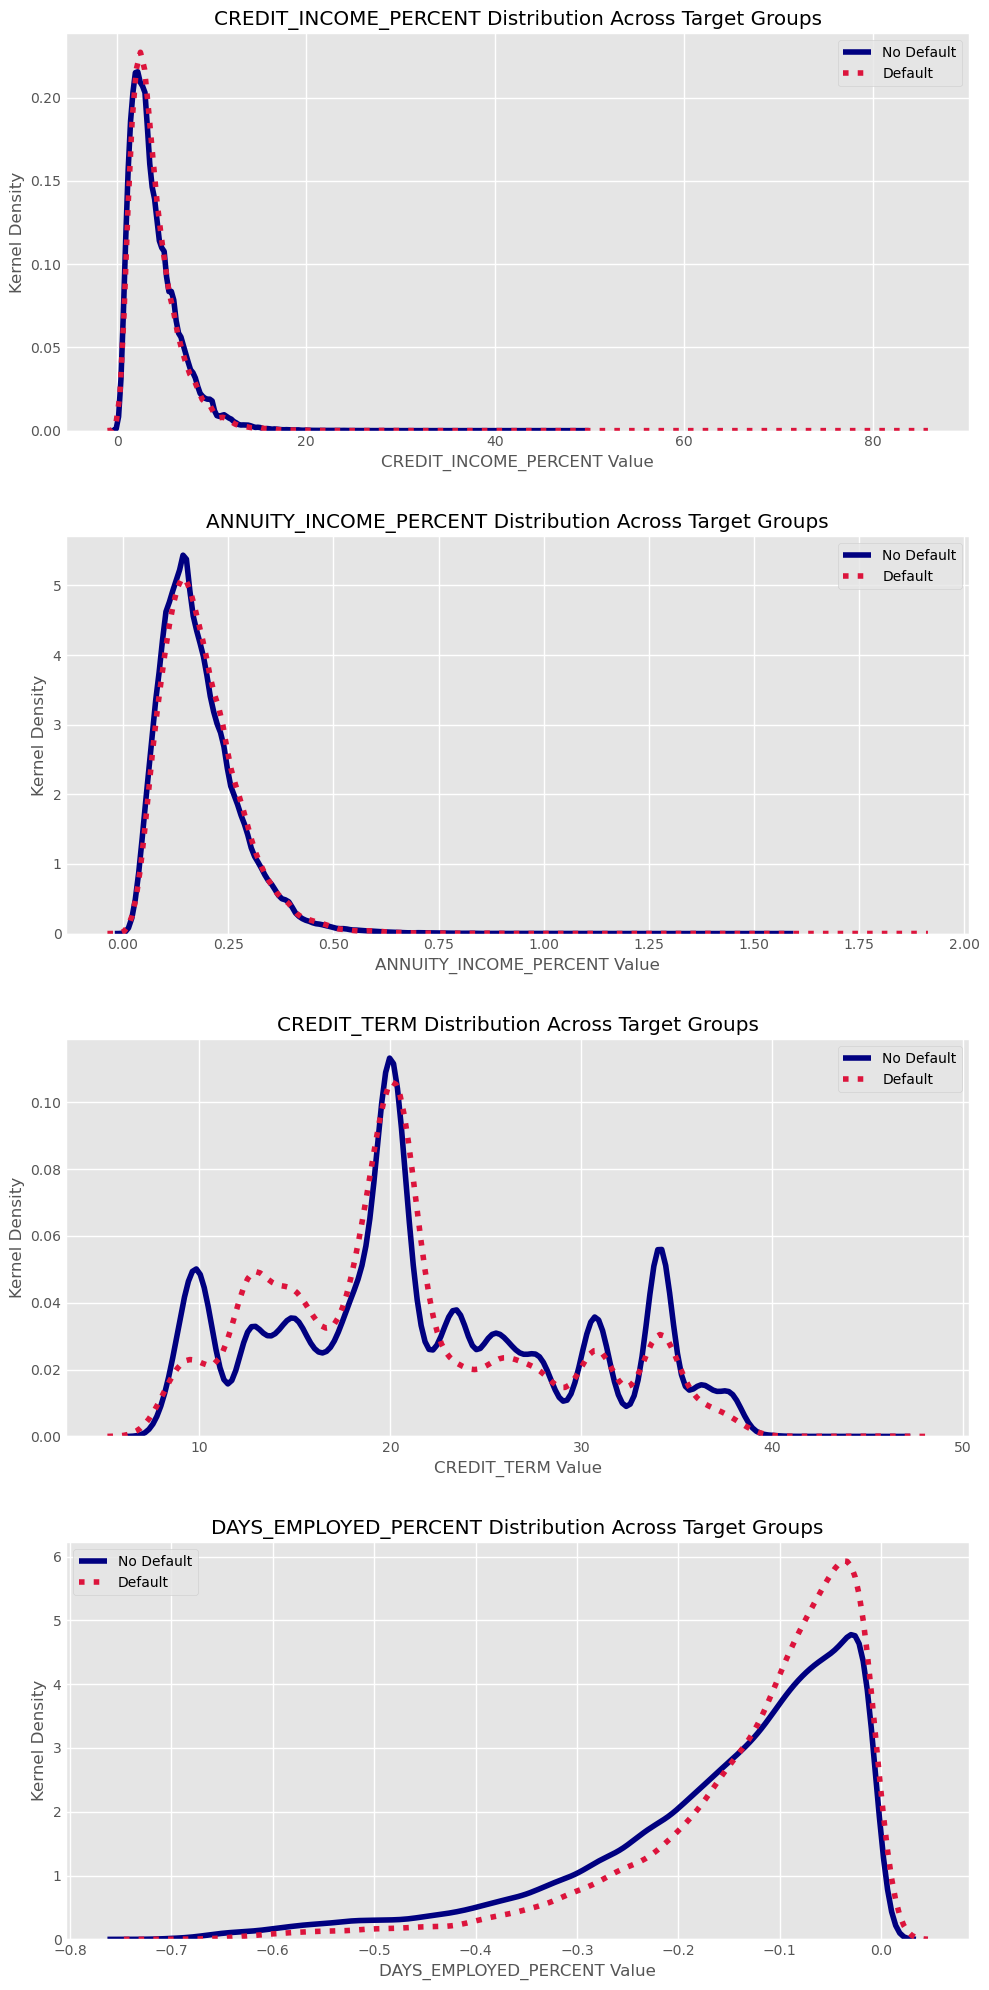

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 20))

features = ['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']
target_status = {0: "No Default", 1: "Default"}

for i, feature in enumerate(features):
    
    plt.subplot(4, 1, i + 1)  # Adjust subplot allocation within the figure
    
    # Plot KDE for TARGET==0
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], 
                label=f"{target_status[0]}", 
                color='navy',  # Changed color
                linestyle='-')  # Changed linestyle for differentiation
    
    # Plot KDE for TARGET==1
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], 
                label=f"{target_status[1]}", 
                color='crimson',  # Changed color
                linestyle=':')  # Changed linestyle
    
    plt.title(f"{feature} Distribution Across Target Groups")  # Modified title for clarity and variety
    plt.xlabel(f"{feature} Value")  # More descriptive label
    plt.ylabel("Kernel Density")  # Slightly modified label text
    plt.legend()

plt.tight_layout(h_pad=3)  # Adjusted padding between plots for better separation
plt.show()


In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

train_label = application_train["TARGET"]

if 'TARGET' in application_train:
    train = application_train.drop(columns = ['TARGET'])
    
else:
    train = application_train.copy()
    
#Feature Names

features = list(train.columns)

test = application_test.copy()

imputer = SimpleImputer(strategy = "median")

scaler = MinMaxScaler(feature_range = (0,1))

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)


scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 109)
Testing data shape:  (48744, 109)


In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)

log_reg.fit(train, train_label)

LogisticRegression(C=0.0001)

In [55]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [56]:
submit = application_test[['SK_ID_CURR']] # With single 

submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.099579
1,100005,0.109396
2,100013,0.081394
3,100028,0.083911
4,100038,0.114504


### Improved Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
import math

#Creating RandomForest instance
random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, verbose = 1, n_jobs = -1)

In [58]:
random_forest.fit(train, train_label)

#Extract Feature Importance
feature_importance_values = random_forest.feature_importances_

feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [59]:
#Make a submission dataframe

submit = application_test[['SK_ID_CURR']]

submit['TARGET'] = predictions

#save the submission dataframe

submit.to_csv('random_forest_baseline.csv', index= False)

## Make predictions using Engineered Features


In [60]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)

poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features

scaler = MinMaxScaler(feature_range = (0,1))

poly_features = scaler.fit_transform(poly_features)

poly_features_test = scaler.transform(poly_features_test)

In [61]:
# Creating RandomForest Instance

random_forest_poly = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42, verbose = 1, n_jobs = -1)

In [62]:
#Train on training data
random_forest_poly.fit(poly_features, train_label)

predictions = random_forest_poly.predict_proba(poly_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [63]:
# Make a submission dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

In [64]:
def plot_feature_importance(df):
    
    df.sort_values('importance', inplace = True)
    df['importance_normalized'] = df['importance']/df['importance'].sum()
    
    plt.figure(figsize = (10,6))
    ax = plt.subplot()
    
    ax.barh(df.feature.tail(15), df['importance_normalized'].tail(15), align = 'center', edgecolor = 'k')
    
    plt.xlabel('Normalized_Features')
    
    plt.title('Feature Importances')
    
    plt.show()
    
    return df.tail(15)
    

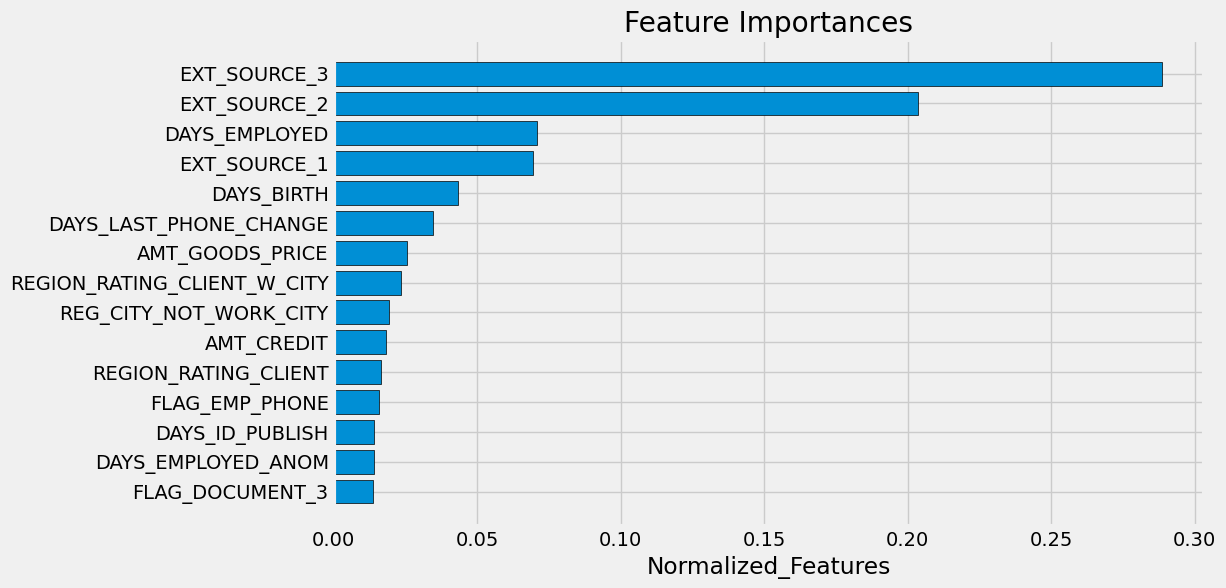

,feature,importance,importance_normalized
83,FLAG_DOCUMENT_3,0.013742,0.013742
108,DAYS_EMPLOYED_ANOM,0.013953,0.013953
13,DAYS_ID_PUBLISH,0.014127,0.014127
16,FLAG_EMP_PHONE,0.015728,0.015728
22,REGION_RATING_CLIENT,0.016357,0.016357
6,AMT_CREDIT,0.018089,0.018089
29,REG_CITY_NOT_WORK_CITY,0.019282,0.019282
23,REGION_RATING_CLIENT_W_CITY,0.023521,0.023521
8,AMT_GOODS_PRICE,0.025522,0.025522
81,DAYS_LAST_PHONE_CHANGE,0.034675,0.034675


In [65]:
plot_feature_importance(feature_importances)

## Random forest training

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Split the training data into a new training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(application_train.drop(columns=['TARGET']), 
                                                  application_train['TARGET'], test_size=0.2, 
                                                  random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions_val = rf_model.predict_proba(X_val)[:, 1]
rf_auc = roc_auc_score(y_val, rf_predictions_val)
print('Random Forest Validation AUC:', rf_auc)

Random Forest Validation AUC: 0.7065987151056989


In [86]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Preprocess the training and validation data
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Now r
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_pipeline = make_pipeline(imputer, lr_model)  # Incorporate imputer into a pipeline
lr_pipeline.fit(X_train, y_train)  # Fit model with the original X_train
lr_probabilities = lr_pipeline.predict_proba(X_val)[:, 1]
lr_auc = roc_auc_score(y_val, lr_probabilities)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pipeline = make_pipeline(imputer, rf_model)  # Incorporate imputer into a pipeline
rf_pipeline.fit(X_train, y_train)  # Fit model with the original X_train
rf_probabilities = rf_pipeline.predict_proba(X_val)[:, 1]
rf_auc = roc_auc_score(y_val, rf_probabilities)


In [87]:
print('Logistic regression Validation AUC:', lr_auc)
print('Random Forest Validation AUC:', rf_auc)

Logistic regression Validation AUC: 0.6374831607180167
Random Forest Validation AUC: 0.7050577845432686


## ROC Curves for Comparison

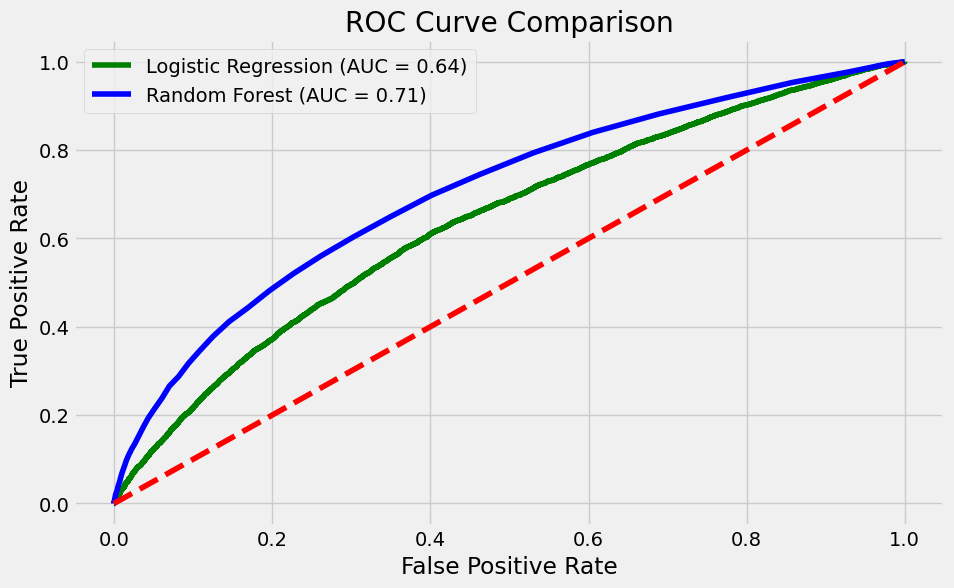

In [88]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve data
fpr_lr, tpr_lr, _ = roc_curve(y_val, lr_probabilities)
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_probabilities)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
